In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

!gdown https://drive.google.com/uc?id=1JkCpzOk8qqakxUW-phQi6JeAah_mIn90


# Definir rutas
zip_path = '/content/split_data608.zip'
extract_path = '/content'

# Crear carpeta de destino si no existe
os.makedirs(extract_path, exist_ok=True)

# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Archivo descomprimido en:", extract_path)

Mounted at /content/drive
Downloading...
From (original): https://drive.google.com/uc?id=1JkCpzOk8qqakxUW-phQi6JeAah_mIn90
From (redirected): https://drive.google.com/uc?id=1JkCpzOk8qqakxUW-phQi6JeAah_mIn90&confirm=t&uuid=8fea26ec-97e6-4f4b-89a7-296af002c6e8
To: /content/split_data608.zip
100% 1.48G/1.48G [00:30<00:00, 48.9MB/s]
Archivo descomprimido en: /content


In [ ]:
!pip install lightning --quiet
!pip install torchviz --quiet
!pip install hiddenlayer --quiet
!pip install onnx --quiet
!pip install lpips --quiet
!pip install scikit-image lpips
!pip install wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import wandb
wandb.login(key="b796b23334af90b74dcb161b0b8c08325c2a6a6b")


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jmroldan9810 (jmroldan9810-unir) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
wandb.init(project="galaxy-superres")

In [ ]:
import os
from PIL import Image

def check_image_sizes(directory):
    sizes = {}
    print(f"\nAnalizando: {directory}")
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        try:
            with Image.open(path) as img:
                size = img.size
                sizes[size] = sizes.get(size, 0) + 1
        except Exception as e:
            print(f"Error con {filename}: {e}")

    for size, count in sizes.items():
        print(f"{count} imágenes de tamaño {size[0]}x{size[1]}")
    if not sizes:
        print("No se encontraron imágenes válidas.")

# Carpetas a verificar
print("Train")
check_image_sizes("/content/split_data/train/acs")  # LR
check_image_sizes("/content/split_data/train/dud")  # HR
print("Test")
check_image_sizes("/content/split_data/test/acs")  # LR
check_image_sizes("/content/split_data/test/dud")  # HR
print("Validation")
check_image_sizes("/content/split_data/val/acs")    # LR
check_image_sizes("/content/split_data/val/dud")    # HR

Train

Analizando: /content/split_data/train/acs
103129 imágenes de tamaño 608x608

Analizando: /content/split_data/train/dud
103129 imágenes de tamaño 152x152
Test

Analizando: /content/split_data/test/acs
12892 imágenes de tamaño 608x608

Analizando: /content/split_data/test/dud
12892 imágenes de tamaño 152x152
Validation

Analizando: /content/split_data/val/acs
12891 imágenes de tamaño 608x608

Analizando: /content/split_data/val/dud
12891 imágenes de tamaño 152x152


In [ ]:
import torch
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot
from torchsummary import summary
import os, glob
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import lightning as L
from lightning.fabric.utilities.seed import seed_everything
from lightning.pytorch.loggers.wandb import WandbLogger
from lightning.pytorch.callbacks import EarlyStopping


In [ ]:
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.best_model_state = {k: v.cpu() for k, v in model.state_dict().items()}
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as T
import os

class PrepareDataset(Dataset):
    def __init__(self, dud_dir, acs_dir, max_items=None, target_size=(608, 608)):
        self.dud_paths = sorted(os.listdir(dud_dir))
        self.acs_paths = sorted(os.listdir(acs_dir))
        if max_items:
            self.dud_paths = self.dud_paths[:max_items]
            self.acs_paths = self.acs_paths[:max_items]
        self.dud_dir = dud_dir
        self.acs_dir = acs_dir
        self.target_size = target_size
        self.transform = T.ToTensor()

    def __len__(self):
        return len(self.dud_paths)

    def __getitem__(self, idx):
        dud_path = os.path.join(self.dud_dir, self.dud_paths[idx])
        acs_path = os.path.join(self.acs_dir, self.acs_paths[idx])
        dud = Image.open(dud_path).convert("L")
        acs = Image.open(acs_path).convert("L")
        dud = dud.resize(self.target_size, Image.BICUBIC)
        return self.transform(dud), self.transform(acs)


In [ ]:
import torch
import torch.nn as nn

class UNet_SuperResolution(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, features=[64, 128, 256, 512, 1024, 2048], dropout_rate=0.1, n_groups=8):
        super().__init__()
        act = nn.SiLU

        def block(in_f, out_f):
            return nn.Sequential(
                nn.Conv2d(in_f, out_f, 3, padding=1),
                nn.GroupNorm(num_groups=min(n_groups, out_f), num_channels=out_f),
                act(),
                nn.Conv2d(out_f, out_f, 3, padding=1),
                nn.GroupNorm(num_groups=min(n_groups, out_f), num_channels=out_f),
                act(),
                nn.Dropout(dropout_rate)
            )

        # Encoder
        self.enc1 = block(in_channels, features[0])
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = block(features[0], features[1])
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = block(features[1], features[2])
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = block(features[2], features[3])
        self.pool4 = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = block(features[3], features[4])

        self.up1 = nn.ConvTranspose2d(features[4], features[3], 2, stride=2)
        self.dec1 = block(features[4], features[3])
        self.up2 = nn.ConvTranspose2d(features[3], features[2], 2, stride=2)
        self.dec2 = block(features[3], features[2])
        self.up3 = nn.ConvTranspose2d(features[2], features[1], 2, stride=2)
        self.dec3 = block(features[2], features[1])
        self.up4 = nn.ConvTranspose2d(features[1], features[0], 2, stride=2)
        self.dec4 = block(features[1], features[0])
        self.final = nn.Sequential(nn.Conv2d(features[0], out_channels, 1),nn.Tanh())

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool1(e1)
        e2 = self.enc2(p1)
        p2 = self.pool2(e2)
        e3 = self.enc3(p2)
        p3 = self.pool3(e3)
        e4 = self.enc4(p3)
        p4 = self.pool4(e4)
        b = self.bottleneck(p4)
        up1 = self.up1(b)
        cat1 = torch.cat([up1, e4], dim=1)
        d1 = self.dec1(cat1)
        up2 = self.up2(d1)
        cat2 = torch.cat([up2, e3], dim=1)
        d2 = self.dec2(cat2)
        up3 = self.up3(d2)
        cat3 = torch.cat([up3, e2], dim=1)
        d3 = self.dec3(cat3)
        up4 = self.up4(d3)
        cat4 = torch.cat([up4, e1], dim=1)
        d4 = self.dec4(cat4)
        out = self.final(d4)
        return out



In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
import lpips
from tqdm import tqdm



train_dataset = PrepareDataset(
    dud_dir='/content/split_data/train/dud',
    acs_dir='/content/split_data/train/acs',
    max_items=103129
)
val_dataset = PrepareDataset(
    dud_dir='/content/split_data/val/dud',
    acs_dir='/content/split_data/val/acs',
    max_items=12891
)

test_dataset = PrepareDataset(
    dud_dir='/content/split_data/test/dud',
    acs_dir='/content/split_data/test/acs',
    max_items=12892
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=8)
test_loader   = DataLoader(test_dataset,   batch_size=8)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet_SuperResolution(in_channels=1, out_channels=1, features=[64,128,256,512,1024,2048],dropout_rate=0.2).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=3e-6)
loss_fn = nn.MSELoss()
lpips_fn = lpips.LPIPS(net='vgg').to(device)








Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 204MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth


In [ ]:
model

UNet_SuperResolution(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): GroupNorm(8, 64, eps=1e-05, affine=True)
    (2): SiLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): GroupNorm(8, 64, eps=1e-05, affine=True)
    (5): SiLU()
    (6): Dropout(p=0.2, inplace=False)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): GroupNorm(8, 128, eps=1e-05, affine=True)
    (2): SiLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): GroupNorm(8, 128, eps=1e-05, affine=True)
    (5): SiLU()
    (6): Dropout(p=0.2, inplace=False)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): 

Epoch 1/10 [Val]: 100%|██████████| 1612/1612 [05:03<00:00,  5.31it/s]
wandb: WARNING Data passed to `wandb.Image` should consist of values in the range [0, 255], image data will be normalized to this range, but behavior will be removed in a future version of wandb.


Epoch 1/10 - Train Loss: 0.0003
              - Val Loss: 0.0002


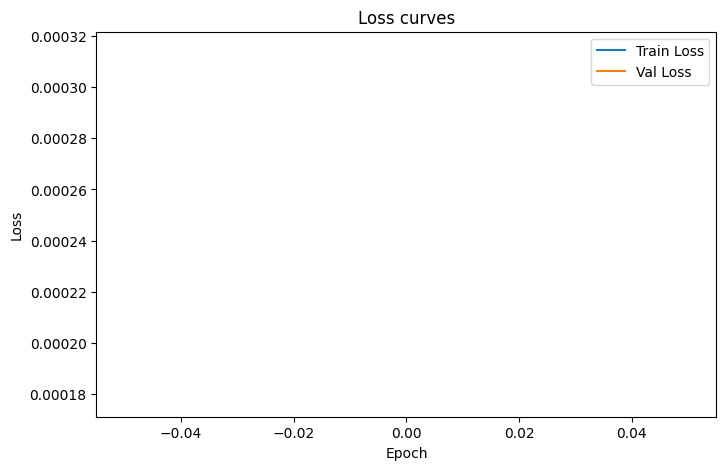

Epoch 2/10 [Val]: 100%|██████████| 1612/1612 [05:03<00:00,  5.31it/s]


Epoch 2/10 - Train Loss: 0.0001
              - Val Loss: 0.0001


Epoch 3/10 [Val]: 100%|██████████| 1612/1612 [05:03<00:00,  5.31it/s]


Epoch 3/10 - Train Loss: 0.0001
              - Val Loss: 0.0001


Epoch 4/10 [Val]: 100%|██████████| 1612/1612 [05:02<00:00,  5.34it/s]


Epoch 4/10 - Train Loss: 0.0001
              - Val Loss: 0.0001


Epoch 5/10 [Val]: 100%|██████████| 1612/1612 [05:02<00:00,  5.33it/s]


Epoch 5/10 - Train Loss: 0.0001
              - Val Loss: 0.0001


Epoch 6/10 [Val]: 100%|██████████| 1612/1612 [05:02<00:00,  5.34it/s]


Epoch 6/10 - Train Loss: 0.0001
              - Val Loss: 0.0001


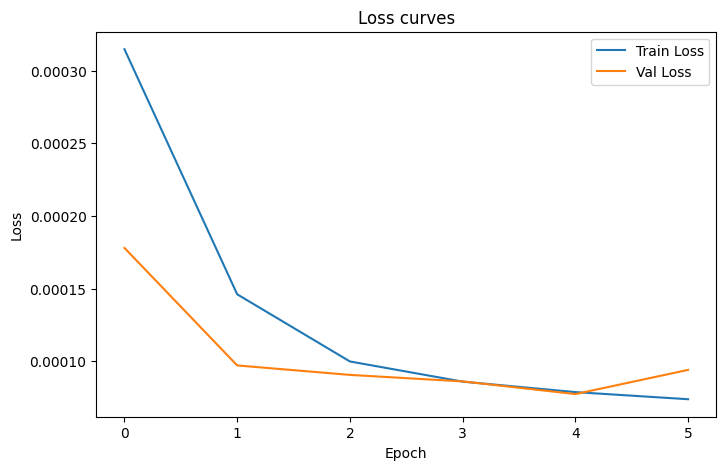

Epoch 7/10 [Val]: 100%|██████████| 1612/1612 [05:05<00:00,  5.28it/s]


Epoch 7/10 - Train Loss: 0.0001
              - Val Loss: 0.0001


Epoch 8/10 [Val]: 100%|██████████| 1612/1612 [04:55<00:00,  5.45it/s]


Epoch 8/10 - Train Loss: 0.0001
              - Val Loss: 0.0001


Epoch 9/10 [Val]: 100%|██████████| 1612/1612 [04:56<00:00,  5.44it/s]

Epoch 9/10 - Train Loss: 0.0001
              - Val Loss: 0.0001
Early stopping activated!


In [ ]:
import wandb
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import matplotlib.pyplot as plt

wandb.init(project="galaxy-superres",name="SuperRes2048_All_Dataset")

train_history = []
val_history = []

epochs = 10
early_stopping = EarlyStopping(patience=8, min_delta=0.001)

for epoch in range(epochs):
    model.train()
    epoch_losses = []
    for dud_up, acs in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"):
        dud_up, acs = dud_up.to(device), acs.to(device)
        pred = model(dud_up)
        loss = loss_fn(pred, acs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    avg_loss = sum(epoch_losses) / len(epoch_losses)
    train_history.append(avg_loss)

    model.eval()
    val_losses = []
    example_img = None
    example_gt = None
    example_pred = None
    with torch.no_grad():
        for batch_idx, (dud_up, acs) in enumerate(tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]")):
            dud_up, acs = dud_up.to(device), acs.to(device)
            pred = model(dud_up)
            val_loss = loss_fn(pred, acs)
            val_losses.append(val_loss.item())
            # Guarda una imagen ejemplo (solo la primera vez)
            if batch_idx == 0:
                example_img = dud_up[0].cpu().numpy().squeeze()
                example_pred = pred[0].cpu().numpy().squeeze()
                example_gt = acs[0].cpu().numpy().squeeze()
    avg_val_loss = sum(val_losses) / len(val_losses)
    val_history.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_loss:.4f}")
    print(f"              - Val Loss: {avg_val_loss:.4f}")

    # Log en wandb (loss)
    wandb.log({
        "train_loss": avg_loss,
        "val_loss": avg_val_loss,
        "epoch": epoch+1
    })


    if (epoch+1) % 1 == 0 or early_stopping.early_stop:
        # Imágenes
        wandb.log({
            "DUD upsampled": wandb.Image(example_img, caption="Input (DUD upsampled)"),
            "Prediction": wandb.Image(example_pred, caption="Super-resolved"),
            "ACS GT": wandb.Image(example_gt, caption="ACS (GT)"),
            "epoch": epoch+1
        })
        # Métricas de imagen (PSNR y SSIM)
        p_val = psnr(example_gt, example_pred, data_range=1)
        s_val = ssim(example_gt, example_pred, data_range=1)
        wandb.log({
            "val_PSNR": p_val,
            "val_SSIM": s_val,
            "epoch": epoch+1
        })

    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping activated!")
        break

    # Grafica loss cada 5 épocas o si hay early stop
    if epoch % 5 == 0 or early_stopping.early_stop:
        plt.figure(figsize=(8,5))
        plt.plot(train_history, label='Train Loss')
        plt.plot(val_history, label='Val Loss')
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss curves")
        plt.show()


In [ ]:
import torch
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import lpips

model.eval()
lpips_fn = lpips.LPIPS(net='vgg').to(device)

psnr_test, ssim_test, lpips_test = [], [], []
invalid_count = 0

with torch.no_grad():
    for dud_up, acs in test_loader:
        dud_up, acs = dud_up.to(device), acs.to(device)
        output = model(dud_up)

        for i in range(output.shape[0]):
            pred = output[i].detach().cpu().numpy().squeeze()
            gt = acs[i].detach().cpu().numpy().squeeze()
            pred_img = np.clip(pred, 0, 1)
            gt_img = np.clip(gt, 0, 1)

            this_psnr = psnr(gt_img, pred_img, data_range=1)
            this_ssim = ssim(gt_img, pred_img, data_range=1)


            pred_lpips = torch.tensor(pred_img).unsqueeze(0).unsqueeze(0) * 2 - 1
            gt_lpips = torch.tensor(gt_img).unsqueeze(0).unsqueeze(0) * 2 - 1
            pred_lpips = pred_lpips.to(device).float()
            gt_lpips = gt_lpips.to(device).float()
            this_lpips = lpips_fn(pred_lpips, gt_lpips).item()


            if np.isfinite(this_psnr) and np.isfinite(this_ssim) and np.isfinite(this_lpips):
                psnr_test.append(this_psnr)
                ssim_test.append(this_ssim)
                lpips_test.append(this_lpips)
            else:
                invalid_count += 1

print(f"PSNR promedio: {np.mean(psnr_test):.2f}")
print(f"SSIM promedio: {np.mean(ssim_test):.4f}")
print(f"LPIPS promedio): {np.mean(lpips_test):.4f}")

print(f"Número de casos inválidos: {invalid_count}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth
PSNR promedio: 44.22
SSIM promedio: 0.9509
LPIPS promedio): 0.0178
Número de casos inválidos: 0


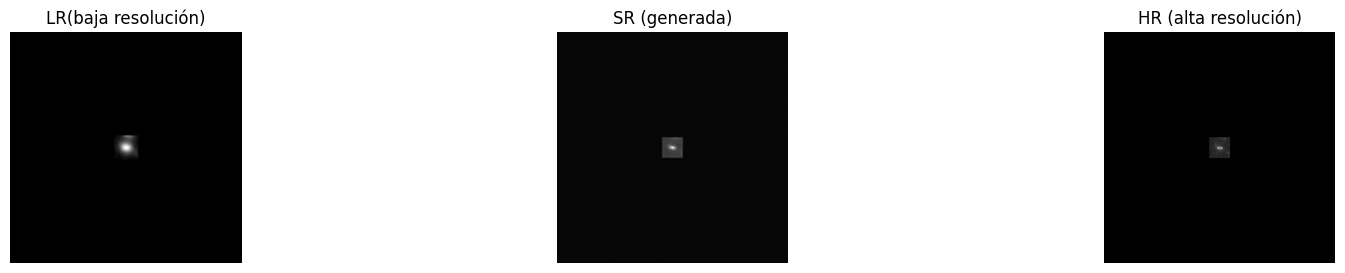

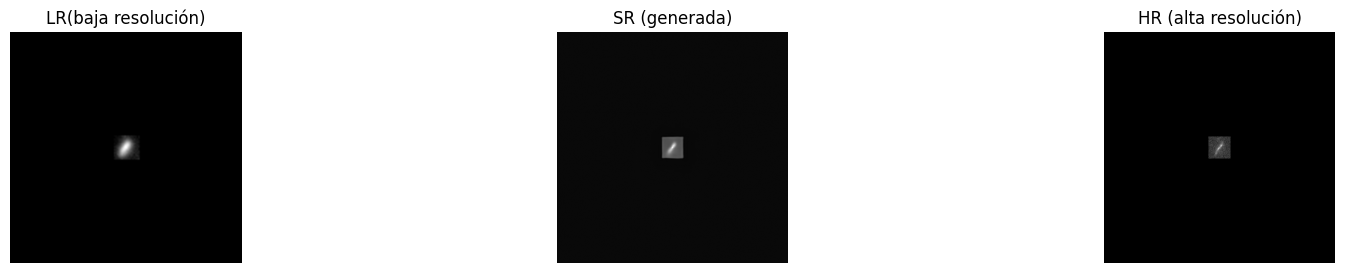

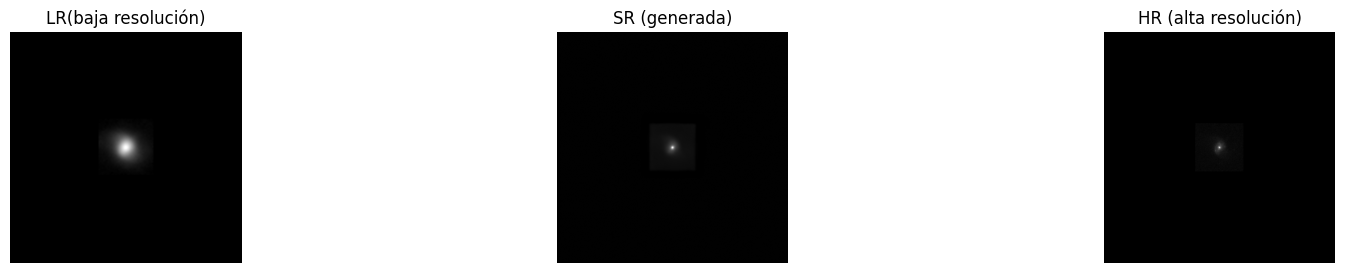

In [ ]:
import matplotlib.pyplot as plt
import random

model.eval()

# Elige 3 índices aleatorios del dataset de testing
n = len(test_dataset)
indices = random.sample(range(n), 3)

for idx in indices:
    dud_up, acs = test_dataset[idx]
    dud_up = dud_up.unsqueeze(0).to(device)
    acs = acs.unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(dud_up)

    plt.figure(figsize=(20,3))
    plt.subplot(1,3,1)
    plt.title("LR(baja resolución)")
    plt.imshow(dud_up.cpu().squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("SR (generada)")
    plt.imshow(output.cpu().squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("HR (alta resolución)")
    plt.imshow(acs.cpu().squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()


In [ ]:
import torch

save_path = "/content/drive/MyDrive/202425_Q2_ID20.2_SRGalaxy_102_Mariana_Miguel_Jorge/super-resolucion-galaxias/Model/superres_final_checkpoint.pth"

checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': epoch,
    'train_history': train_history,
    'val_history': val_history,
    'model_config': {
        'in_channels': 1,
        'out_channels': 1,
        'features': [64, 128, 256, 512, 1024, 2048],
        'dropout_rate': 0.2,
        'n_groups': getattr(model, 'n_groups', 8),  # Si tu modelo tiene n_groups, de lo contrario puedes poner 8
    },
    'train_config': {
        'lr': 3e-6,
        'batch_size': 8,
        'max_items': 103129,
        'val_max_items': 12891,
        'test_max_items': 12892,
        'epochs': epochs
    }
}

torch.save(checkpoint, save_path)
print(f"✔️ Checkpoint guardado en: {save_path}")


✔️ Checkpoint guardado en: /content/drive/MyDrive/202425_Q2_ID20.2_SRGalaxy_102_Mariana_Miguel_Jorge/super-resolucion-galaxias/Model/superres_final_checkpoint.pth


In [ ]:
import torch

checkpoint_path = "/content/drive/MyDrive/202425_Q2_ID20.2_SRGalaxy_102_Mariana_Miguel_Jorge/super-resolucion-galaxias/Model/superres_final_checkpoint.pth"

modelcargado = UNet_SuperResolution(in_channels=1, out_channels=1, features=[64,128,256,512,1024], dropout_rate=0.1, n_groups=8)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

modelcargado.load_state_dict(torch.load(checkpoint_path, map_location=device)['model_state_dict'])
modelcargado.to(device)
modelcargado.eval()


UNet_SuperResolution(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): GroupNorm(8, 64, eps=1e-05, affine=True)
    (2): SiLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): GroupNorm(8, 64, eps=1e-05, affine=True)
    (5): SiLU()
    (6): Dropout(p=0.1, inplace=False)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): GroupNorm(8, 128, eps=1e-05, affine=True)
    (2): SiLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): GroupNorm(8, 128, eps=1e-05, affine=True)
    (5): SiLU()
    (6): Dropout(p=0.1, inplace=False)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): 

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
import lpips
from tqdm import tqdm
from torch.utils.data import DataLoader




train_dataset = PrepareDataset(
    dud_dir='/content/split_data/train/dud',
    acs_dir='/content/split_data/train/acs',
    max_items=103129
)
val_dataset = PrepareDataset(
    dud_dir='/content/split_data/val/dud',
    acs_dir='/content/split_data/val/acs',
    max_items=12891
)

test_dataset = PrepareDataset(
    dud_dir='/content/split_data/test/dud',
    acs_dir='/content/split_data/test/acs',
    max_items=12892
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=8)
test_loader   = DataLoader(test_dataset,   batch_size=8)

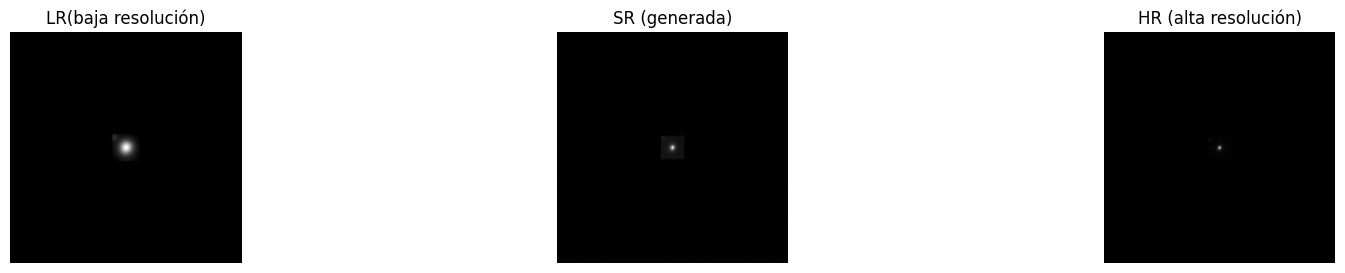

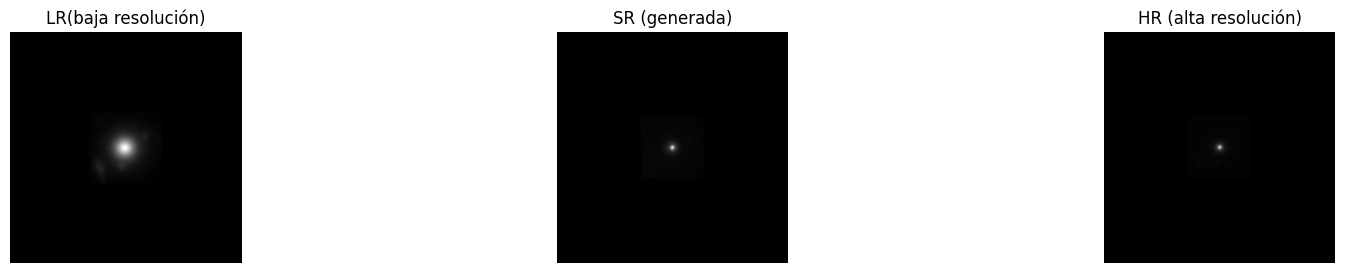

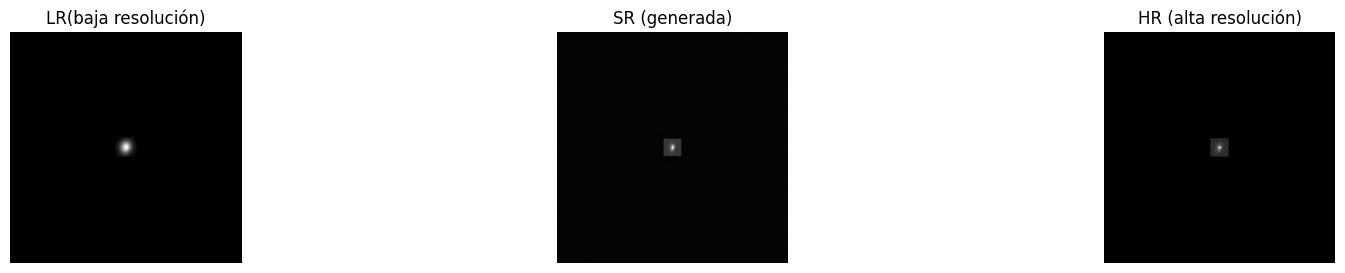

In [ ]:
# Elige 3 índices aleatorios del dataset de testing
n = len(test_dataset)
indices = random.sample(range(n), 3)

for idx in indices:
    dud_up, acs = test_dataset[idx]
    dud_up = dud_up.unsqueeze(0).to(device)
    acs = acs.unsqueeze(0).to(device)
    with torch.no_grad():
        output = modelcargado(dud_up)

    plt.figure(figsize=(20,3))
    plt.subplot(1,3,1)
    plt.title("LR(baja resolución)")
    plt.imshow(dud_up.cpu().squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("SR (generada)")
    plt.imshow(output.cpu().squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("HR (alta resolución)")
    plt.imshow(acs.cpu().squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()


In [ ]:
filename_to_find = "n10_103_112779_aug7_fliplr_rot90.png"

# Busca el índice en dud_paths (entrada)
try:
    idx_to_show = test_dataset.dud_paths.index(filename_to_find)
except ValueError:
    raise Exception(f"No se encontró {filename_to_find} en test_dataset.dud_paths")


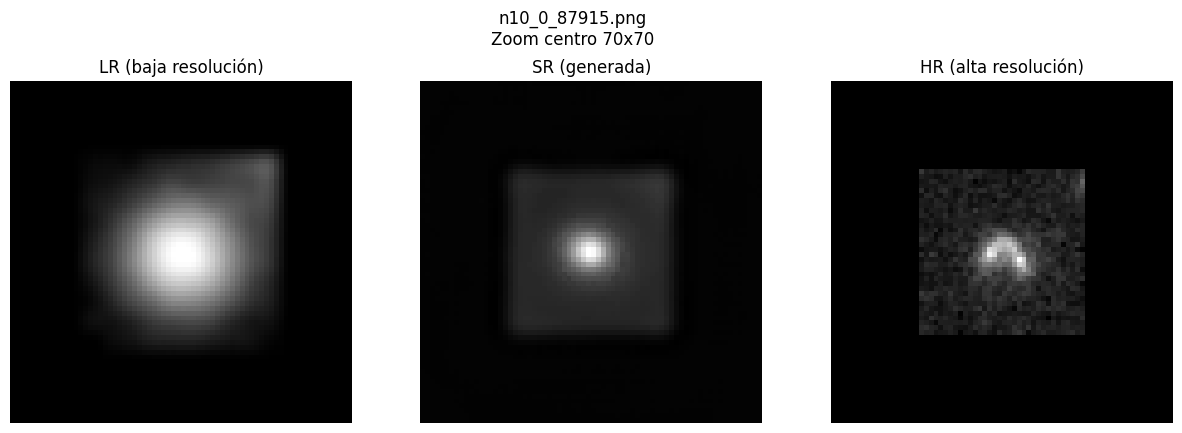

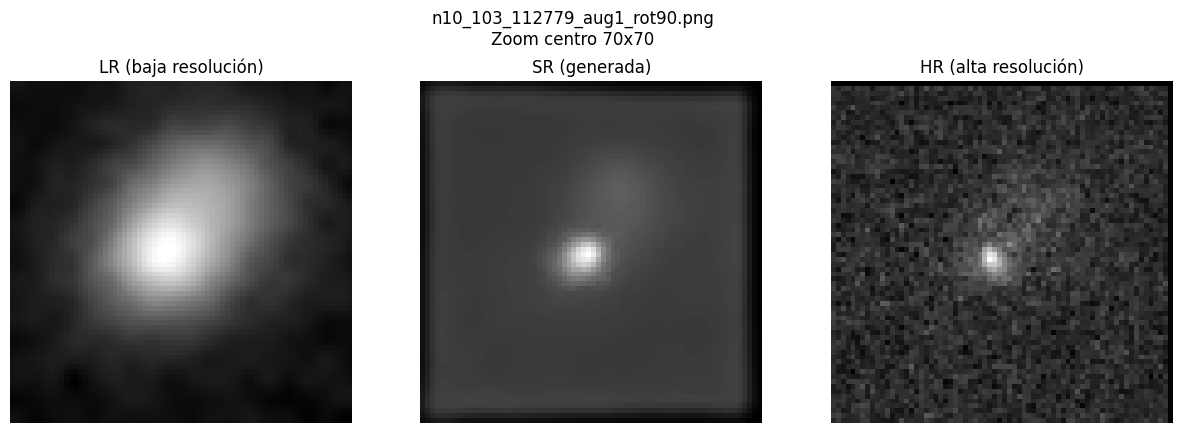

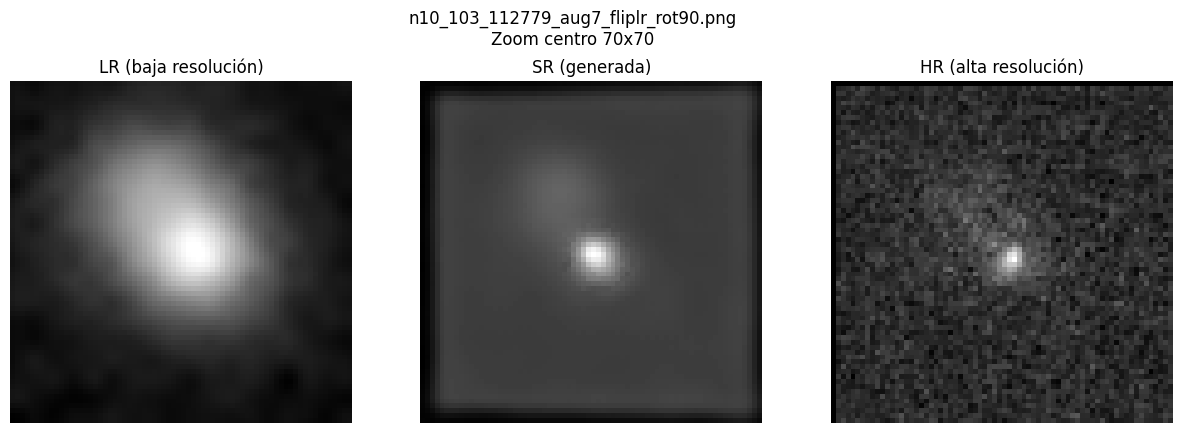

In [ ]:
import matplotlib.pyplot as plt
import torch

def crop_center(img, cropx=128, cropy=128):
    y, x = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx]

# Lista de archivos a mostrar
filenames_to_show = [
    "n10_0_87915.png",
    "n10_103_112779_aug1_rot90.png",
    "n10_103_112779_aug7_fliplr_rot90.png",
]

cropx = cropy = 70

for filename_to_find in filenames_to_show:
    # Encuentra el índice de la imagen
    try:
        idx_to_show = test_dataset.dud_paths.index(filename_to_find)
    except ValueError:
        print(f"⚠️ No se encontró {filename_to_find} en test_dataset.dud_paths")
        continue

    modelcargado.eval()
    with torch.no_grad():
        dud_up, acs = test_dataset[idx_to_show]
        dud_up_tensor = dud_up.unsqueeze(0).to(device)
        pred = modelcargado(dud_up_tensor).cpu().squeeze().numpy()
        input_img = dud_up.squeeze().cpu().numpy()
        gt_img = acs.squeeze().cpu().numpy()

        input_crop = crop_center(input_img, cropx, cropy)
        pred_crop  = crop_center(pred, cropx, cropy)
        gt_crop    = crop_center(gt_img, cropx, cropy)

        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)
        plt.imshow(input_crop, cmap='gray')
        plt.title("LR (baja resolución)")
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.imshow(pred_crop, cmap='gray')
        plt.title("SR (generada)")
        plt.axis('off')
        plt.subplot(1,3,3)
        plt.imshow(gt_crop, cmap='gray')
        plt.title("HR (alta resolución)")
        plt.axis('off')
        plt.suptitle(f"{filename_to_find}\nZoom centro {cropx}x{cropy}")
        plt.show()


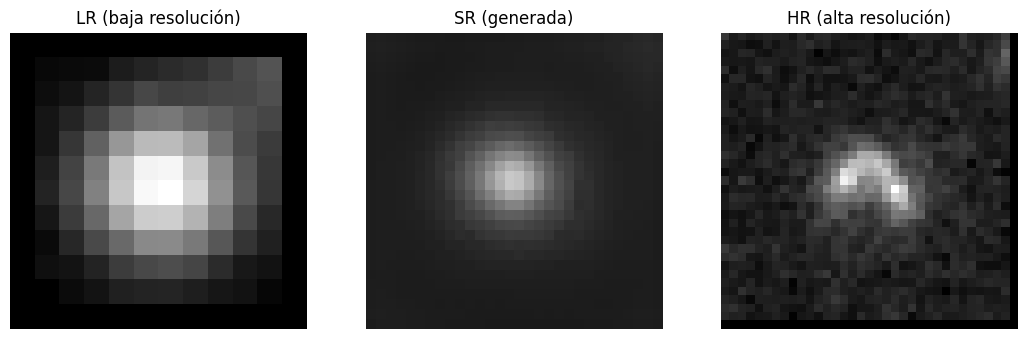

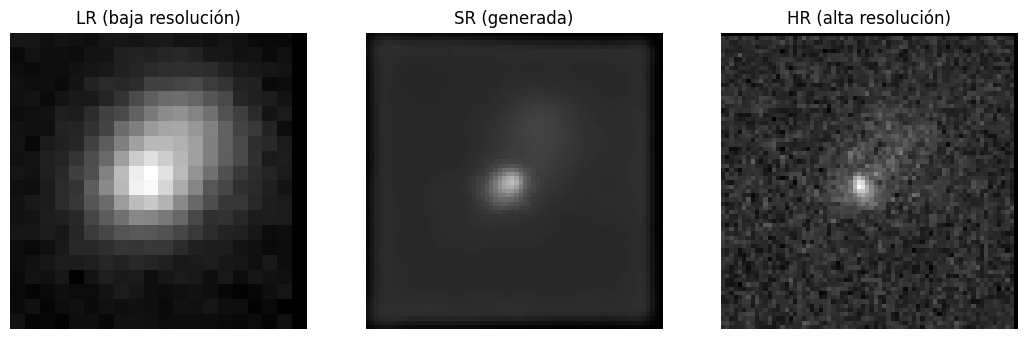

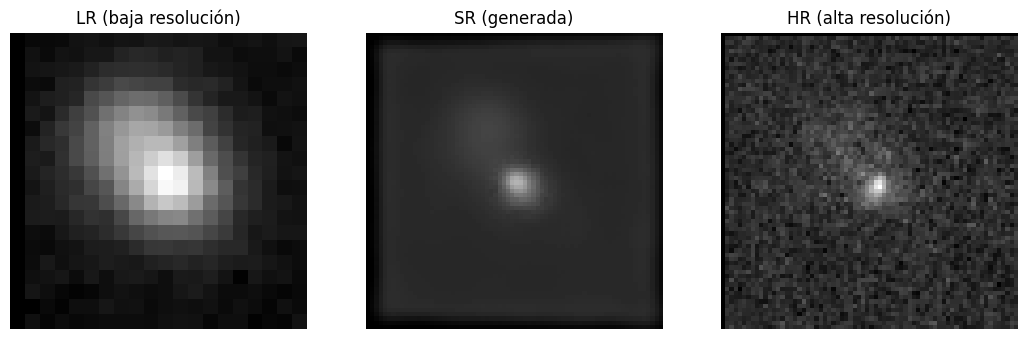

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import torch

dud_dir = '/content/split_data/test/dud'
acs_dir = '/content/split_data/test/acs'

modelcargado.eval()

filenames_to_show = [
    "n10_0_87915.png",
    "n10_103_112779_aug1_rot90.png",
    "n10_103_112779_aug7_fliplr_rot90.png",
]

# Para cada imagen, los tamaños de crop: (LR_crop, SR_crop, HR_crop)
# (height, width) por cada versión
custom_crops = {
    "n10_0_87915.png":       ((12, 12), (30, 30), (35, 35)),
    "n10_103_112779_aug1_rot90.png": ((20, 20), (70, 70), (70, 70)),  # Ejemplo: mismos tamaños
    "n10_103_112779_aug7_fliplr_rot90.png": ((20, 20), (70, 70), (70, 70)),
}

def crop_center(img, cropx, cropy):
    y, x = img.shape
    startx = x // 2 - cropx // 2
    starty = y // 2 - cropy // 2
    return img[starty:starty+cropy, startx:startx+cropx]

for filename in filenames_to_show:
    dud_path = os.path.join(dud_dir, filename)
    acs_path = os.path.join(acs_dir, filename)

    if not os.path.exists(dud_path) or not os.path.exists(acs_path):
        print(f"⚠️ No se encontró {filename}")
        continue

    # ABRIR imágenes originales
    dud_img = Image.open(dud_path).convert("L")
    acs_img = Image.open(acs_path).convert("L")

    # RESIZE para el modelo
    dud_img_resized = dud_img.resize((608, 608), Image.BICUBIC)
    dud_tensor = torch.from_numpy(np.array(dud_img_resized)).unsqueeze(0).unsqueeze(0).float() / 255.0
    dud_tensor = dud_tensor.to(next(modelcargado.parameters()).device)

    with torch.no_grad():
        pred_tensor = modelcargado(dud_tensor)
        pred_img = pred_tensor.squeeze().cpu().numpy()

    # Convertir originales a numpy [0,1]
    dud_np = np.array(dud_img) / 255.0
    acs_np = np.array(acs_img) / 255.0

    # Crops centrados de diferentes tamaños
    lr_crop, sr_crop, hr_crop = custom_crops.get(filename, ((70,70), (70,70), (70,70)))

    dud_crop = crop_center(dud_np, lr_crop[1], lr_crop[0])
    pred_crop = crop_center(pred_img, sr_crop[1], sr_crop[0])
    acs_crop = crop_center(acs_np, hr_crop[1], hr_crop[0])

    # Mostrar
    plt.figure(figsize=(13,5))
    plt.subplot(1,3,1)
    plt.imshow(dud_crop, cmap='gray', vmin=0, vmax=1)
    plt.title(f"LR (baja resolución)")
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(pred_crop, cmap='gray', vmin=0, vmax=1)
    plt.title(f"SR (generada)")
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(acs_crop, cmap='gray', vmin=0, vmax=1)
    plt.title(f"HR (alta resolución)")
    plt.axis('off')
    plt.show()


In [ ]:
import torch
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import lpips

modelcargado.eval()
lpips_fn = lpips.LPIPS(net='vgg').to(device)

mae_test, mse_test, psnr_test, ssim_test, lpips_test = [], [], [], [], []
invalid_count = 0

with torch.no_grad():
    for dud_up, acs in test_loader:
        dud_up, acs = dud_up.to(device), acs.to(device)
        output = modelcargado(dud_up)

        for i in range(output.shape[0]):
            pred = output[i].detach().cpu().numpy().squeeze()
            gt = acs[i].detach().cpu().numpy().squeeze()
            pred_img = np.clip(pred, 0, 1)
            gt_img = np.clip(gt, 0, 1)

            this_mae = np.mean(np.abs(pred_img - gt_img))
            this_mse = np.mean((pred_img - gt_img) ** 2)
            this_psnr = psnr(gt_img, pred_img, data_range=1)
            this_ssim = ssim(gt_img, pred_img, data_range=1)

            # LPIPS espera tensor [B,3,H,W] o [B,1,H,W] en rango [-1,1]
            pred_lpips = torch.tensor(pred_img).unsqueeze(0).unsqueeze(0) * 2 - 1
            gt_lpips = torch.tensor(gt_img).unsqueeze(0).unsqueeze(0) * 2 - 1
            pred_lpips = pred_lpips.to(device).float()
            gt_lpips = gt_lpips.to(device).float()
            this_lpips = lpips_fn(pred_lpips, gt_lpips).item()

            if np.isfinite(this_mae) and np.isfinite(this_mse) and np.isfinite(this_psnr) and np.isfinite(this_ssim) and np.isfinite(this_lpips):
                mae_test.append(this_mae)
                mse_test.append(this_mse)
                psnr_test.append(this_psnr)
                ssim_test.append(this_ssim)
                lpips_test.append(this_lpips)
            else:
                invalid_count += 1

print(f"MAE promedio:  {np.mean(mae_test):.6f}")
print(f"MSE promedio:  {np.mean(mse_test):.6f}")
print(f"PSNR promedio: {np.mean(psnr_test):.6f}")
print(f"SSIM promedio: {np.mean(ssim_test):.6f}")
print(f"LPIPS promedio: {np.mean(lpips_test):.6f}")
print(f"Número de casos inválidos: {invalid_count}")


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth
MAE promedio:  0.002481
MSE promedio:  0.000069
PSNR promedio: 44.224748
SSIM promedio: 0.950865
LPIPS promedio: 0.017756
Número de casos inválidos: 0


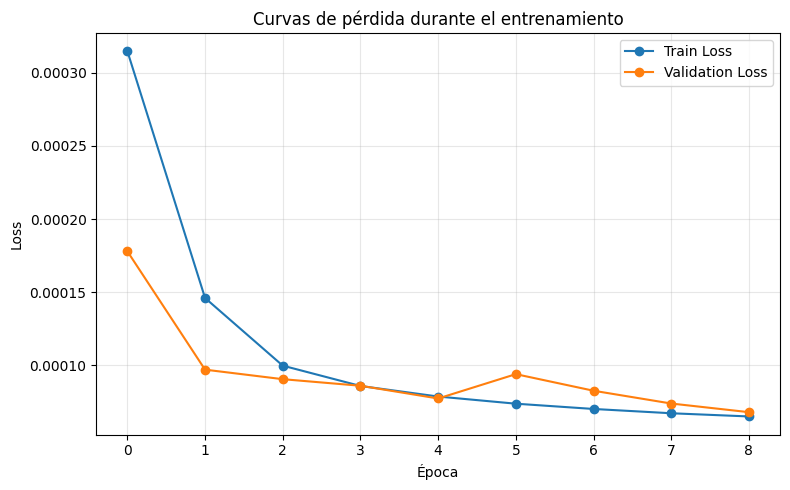

In [ ]:
# Cambia la ruta si es diferente
save_path = "/content/drive/MyDrive/202425_Q2_ID20.2_SRGalaxy_102_Mariana_Miguel_Jorge/super-resolucion-galaxias/Model/superres_final_checkpoint.pth"

# Carga el checkpoint
checkpoint = torch.load(save_path, map_location='cpu')  # usa 'cuda' si quieres en GPU

# Extrae los historiales
train_history = checkpoint['train_history']
val_history = checkpoint['val_history']

# Grafica las curvas
plt.figure(figsize=(8,5))
plt.plot(train_history, label='Train Loss', marker='o')
plt.plot(val_history, label='Validation Loss', marker='o')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('loss_curve.png', dpi=300)
plt.show()